<a href="https://colab.research.google.com/github/DanielRaiicHu/curso_de_estadisticas_2/blob/main/Inicial.ipynb?forceRefresh=true">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

***
# <font color=green size=10>CURSO DE ESTADÍSTICA - PARTE 2</font>
***

In [324]:

import pandas, numpy, scipy, matplotlib

print('Versión de pandas -> %s' % pandas.__version__)
print('Versión de numpy -> %s' % numpy.__version__)
print('Versión de scipy -> %s' % scipy.__version__)
print('Versión de matplotlib -> %s' % matplotlib.__version__)

Versión de pandas -> 2.2.2
Versión de numpy -> 2.0.2
Versión de scipy -> 1.16.0
Versión de matplotlib -> 3.10.0


# <font color=green>1 CONOCIENDO LOS DATOS</font>
***

## <font color=green>1.1 Dataset del proyecto</font>
***

### Encuesta Nacional por Muestreo de Hogares - 2015

La **Encuesta Nacional por Muestreo de Hogares - ENMH** en Brasil anualmente investiga, de manera permanente, características generales de la población, educación, trabajo, ingresos, vivienda y otras, con frecuencia variables, de acuerdo a las necesidades de información del país, tales como las características de migración, fecundidad, nupcialidad, salud, seguridad alimentaria, entre otros temas. La recopilación de estas estadísticas constituye, durante los 49 años de realización de la investigación, un importante instrumento para la formulación, validación y evaluación de políticas orientadas al desarrollo socioeconómico y la mejora de las condiciones de vida en Brasil.

### Fuente de los Datos

Instituto Brasileño de Geografía y Estadística (IBGE) Encuesta Nacional por Muestreo de Hogares(PNAD) en el 2015

### Variables utilizadas

> ### Ingresos
> ***

Ingresos mensuales del trabajo principal para personas de 10 años o más.

> ### Edad
> ***

Edad del residente en años en la fecha de referencia .

> ### Altura (elaboración propia)
> ***

Altura del habitante en metros.

> ### UF
> ***

Unidad Federal

|Código|Descripción|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descripción|
|---|---|
|0|Masculino|
|1|Femenino|

> ### Años de Estudio
> ***

|Código|Descripción|
|---|---|
|1|Sin educación o menos de 1 año|
|2|1 año|
|3|2 años|
|4|3 años|
|5|4 años|
|6|5 años|
|7|6 años|
|8|7 años|
|9|8 años|
|10|9 años|
|11|10 años|
|12|11 años|
|13|12 años|
|14|13 años|
|15|14 años|
|16|15 años o más|
|17|No determinado|
||No aplica|

> ### Color
> ***

|Código|Descripción|
|---|---|
|0|Indígena|
|2|Blanco|
|4|Negro|
|6|Amarillo|
|8|Pardo|
|9|Sin declarar|

#### <font color='red'>Nota</font>
***
> Se realizaron los siguientes tratamientos sobre los datos originales:
> 1. Se eliminaron los registros en los que **Ingreso** no era válido. (999 999 999 999);
> 2. Se eliminaron los registros en los que **Ingreso** eran missing;
> 3. Solo se consideraron los registros de **Personas de Referencia** de cada hogar (responsable del hogar).

### Importando pandas y leyendo el dataset del proyecto

https://pandas.pydata.org/

In [325]:
import pandas as pd

In [326]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [327]:
datos = pd.read_csv('/content/drive/MyDrive/estadisticas_2/datos.csv', encoding ='latin-1')

In [328]:
datos.head()

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


---
---

# <font color=green>2 DISTRIBUCIONES DE PROBABILIDAD</font>
***

## <font color=red>Problema</font>
***

En una competencia para ocupar un puesto de científico de datos, tenemos un total de **10 preguntas** de opción múltiple con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Suponga que un candidato decide aventurarse sin haber estudiado nada. Decide hacer la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y la puntuación de corte es 5**, obtenga la probabilidad de que este candidato **acierte 5 preguntas** y también la probabilidad de que el candidato **pase a la siguiente etapa del proceso de selección**.

## <font color=green>2.1 Distribución Binomial</font>
***

Un evento **binomial** se caracteriza por la posibilidad de que solo ocurran dos categorías. Estas categorías juntas representan todo el espacio muestral, siendo también mutuamente excluyentes, es decir, la ocurrencia de una implica la no ocurrencia de la otra.

En el análisis estadístico, el uso más común de la distribución binomial es para resolver problemas que involucran situaciones de **éxito** y **fracaso**.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Donde:

$p$ = probabilidad de éxito

$q = (1 - p)$ = probabilidad de fracaso

$n$ = número de eventos estudiados

$k$ = número de eventos deseados que tienen éxito

### Experimento Binomial

1. Realización de $n$ pruebas idénticas.

2. Las pruebas son independientes.

3. Solo son posibles dos resultados, por ejemplo: Verdadero o falso; Cara o cruz; Éxito o fracaso.

4. La probabilidad de éxito está representada por $p$ y la probabilidad de fracaso por $1-p = q$. Estas probabilidades no cambian de una prueba para otra.

### Media de la distribución binomial

El valor esperado o la media de la distribución binomial es igual al número de experimentos realizados multiplicado por la probabilidad de que ocurra el evento.

# $$\mu = n \times p$$

### Desviación estándar de la distribución binomial

La desviación estándar es la raíz quadrada del producto entre el número de experimentos, la probabilidad de éxito y la probabilidad de fracaso.

# $$\sigma = \sqrt{n \times p \times q}$$

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html

In [329]:
from scipy.special import comb

### Combinaciones

El número de combinaciones de $n$ objetos, tomando $k$ cada vez, es:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Donde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definición

## $$0! = 1$$

## <font color='blue'>Ejemplo: Mega Sena</font>

En una rueda de lotería Mega Sena tenemos un total de **60 números** para elegir, donde la apuesta mínima es de **seis números**. Usted que es curioso(a) decide calcular la probabilidad de ganar la Mega Sena con solo **un juego**. Para eso necesitamos saber cuántas **combinaciones de seis números se pueden formar con los 60 números disponibles**.

### $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

In [330]:
# Distribución Binomial - Probabilidad combinatoria
# Calcula el número total de combinaciones posibles al seleccionar 6 elementos únicos de un total de 60,
# sin importar el orden (combinación simple sin repetición).
# Ejemplo clásico: juegos de azar como la lotería Mega Sena (elige 6 números del 1 al 60).
combinaciones = comb(60,6)
combinaciones

np.float64(50063860.0)

In [331]:
# Distribución Binomial - Cálculo de probabilidad individual
# Calcula la probabilidad de acertar exactamente una combinación específica de 6 números

probabilidad = 1 / combinaciones

# Imprime la probabilidad con 15 cifras decimales para mayor precisión
print(f'{probabilidad:0.15f}')

0.000000019974489


## <font color='blue'>Ejemplo: Concurso para científico de datos</font>

En una competencia para ocupar un puesto de científico de datos, tenemos un total de **10 preguntas** de opción múltiple con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Suponga que un candidato decide aventurarse sin haber estudiado nada. Decide tomar la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y la puntuación de corte es 5**, obtenga la probabilidad de que este candidato **acierte 5 preguntas** y también la probabilidad de que el candidato **pase a la siguiente etapa del proceso de selección**.

### ¿Cuál es la cantidad de pruebas ($n$)?

In [332]:
# Número total de preguntas
n = 10
n

10

### ¿Las pruebas son independientes?

Sí. La opción elegida en una pregunta no influye en la opción elegida en otra pregunta.

### ¿Sólo dos resultados son posibles en cada prueba?

Sí. El candidato tiene dos posibilidades, ACERTAR o FALLAR una pregunta.

### ¿Cuál es la probabilidad de éxito ($p$)?

In [333]:
numero_de_alternativas_por_pregunta = 3
# Probabilidad de éxito (p)
p = 1/ numero_de_alternativas_por_pregunta
p

0.3333333333333333

### ¿Cuál es la probabilidad de fracaso ($q$)?

In [334]:
# Probabilidad de fracaso (q)
q = 1 - p
q

0.6666666666666667

### ¿Cuál es el número total de eventos para tener éxito ($k$)?

In [335]:
# La cantidad mínima de respuestas correcta para pasar la etapa de selección (k)
k = 5
k

5

### Solución 1

In [336]:
# n = 10                      Número total de preguntas
# k = 5                       Número de aciertos deseados
# num_alternativas = 3        Número de alternativas por pregunta
# p = 1/num_alternativas      Probabilidad de acertar una pregunta
# q = 1 - p    Probabilidad de fallar una pregunta
# Calcula la probabilidad de acertar exactamente 5 preguntas respondiendo al azar
probabilidad = (comb(n,k) * (p ** k) * (q ** (n-k)))
print(f'{probabilidad:.8f}')

0.13656455


### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [337]:
from scipy.stats import binom

### Solución 2

In [338]:
# Calcula la probabilidad de acertar exactamente 5 preguntas con binom.pmf()
# n = 10                      Número total de preguntas
# k = 5                       Número de aciertos deseados
# num_alternativas = 3        Número de alternativas por pregunta
# p = 1/num_alternativas      Probabilidad de acertar una pregunta
probabilidad = binom.pmf(k, n, p)
print(f'{probabilidad:8f}')

0.136565


### Obtenga la probabilidad de que el candidato apruebe

### $$P(acertar \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P(10)$$

>`n = 10                      Número total de preguntas`

>`k = 5                       Número de aciertos deseados`

>`num_alternativas = 3        Número de alternativas por pregunta`

>`p = 1/num_alternativas      Probabilidad de acertar una pregunta`

In [339]:
# Cual es la probabilidad de que el candidato acierte como mínimo 5 preguntas.
binom.pmf(5, n, p) + binom.pmf(6, n, p) + binom.pmf(7, n, p) + binom.pmf(8, n, p) + binom.pmf(9, n, p) + binom.pmf(10, n, p)


np.float64(0.21312808006909476)

In [340]:
# Cual es la probabilidad de que el candidato acierte como mínimo 5 preguntas.
# Lo mismo pero más simplificado
binom.pmf([5,6,7,8,9,10], n, p).sum()

np.float64(0.21312808006909476)

In [341]:
# Opción 1: utilizando complemento de la función de distribución acumulada
# Usamos 4 como límite porque representa el **máximo número de aciertos permitido para fracasar**.
1 - binom.cdf(4, n, p)

np.float64(0.21312808006909523)

**P(X = k)**

Se lee:  
>**"Probabilidad de que X sea igual a k"**

O más específicamente en este contexto:  

>**"Probabilidad de que el candidato acierte exactamente k preguntas"**

---

**Ejemplos prácticos:**

- `P(X = 5)` → Probabilidad de acertar **exactamente 5 preguntas**
- `P(X ≤ 4)` → Probabilidad de acertar **como máximo 4 preguntas**
- `P(X ≥ 5)` → Probabilidad de acertar **5 o más preguntas**
- `P(X > 7)` → Probabilidad de acertar **más de 7 preguntas**


In [342]:
# Opción 2: utilizando survival function (P(X > 4) = P(X ≥ 5))
# Es equivalente a 1 - binom.cdf(4, n, p), pero más directa y precisa numéricamente.
# Usamos 4 como límite porque representa el **máximo número de aciertos permitido para fracasar**.
binom.sf(4, n, p)

np.float64(0.21312808006909525)

* Una moneda perfectamente equilibrada se lanza al aire cuatro veces. Usando la distribución binomial, obtenga la probabilidad de que la moneda caiga con la cruz hacia arriba dos veces.


In [343]:
from scipy.stats import binom
# pmf = Probability Mass Function
# Calcula la probabilidad de que la variable aleatoria sea exactamente igual a un valor específico.

p = 1 / 2      # Probabilidad de salir CRUZ
n = 4          # Total de lanzamientos
k = 2          # Total de aciertos (CRUZ hacia arriba)

binom.pmf(k, n, p)

np.float64(0.375)

* Un dado perfectamente equilibrado se lanza hacia arriba diez veces. Usando la distribución binomial, obtenga la probabilidad de que los dados caigan con el número cinco hacia arriba al menos tres veces.

In [344]:
# Distribución Binomial - Probabilidad de obtener al menos 3 veces el número 5 al lanzar un dado 10 veces

p = 1/6 # Probabilidad de salir el número CINCO
n = 10  # Total de lanzamientos
k = 2   # Máximo número de veces permitido para que NO se considere común

# Calculamos P(X ≥ 3) = P(X > 2) usando survival function (sf)
# Calcula la probabilidad en porcentaje de obtener el número cinco al menos 3 veces
binom.sf(k, n, p) * 100


np.float64(22.477320212874055)

## <font color='blue'>Ejemplo: Yincana</font>

Una ciudad del interior realiza una yincana cada año para recaudar fondos para el hospital de la ciudad. En la última competencia se sabe que la **proporción de mujeres participantes fue del 60%**. **El número total de equipos, con 12 miembros, inscritos en la yincana de este año es 30**. Con la información anterior, responda: ¿Cuántos equipos deberían estar formados por **8 mujeres**?

### Solución

In [345]:
# Probabilidad de seleccionar una persona del sexo femenino
p = 0.6
p

0.6

In [346]:
# Cantidad de personas en cada equipo
n = 12
n

12

In [347]:
# Cantidad de mujeres que queremos en cada equipo
k = 8
k

8

In [348]:
# Calcula la probabilidad de que un equipo tenga exactamente 8 mujeres
probabilildad = binom.pmf(k, n, p)
print(f'{probabilidad:.8f}')

0.13656455


In [349]:
# Calcula el número esperado de equipos con exactamente 8 mujeres
# Multiplicamos la probabilidad por el total de equipos inscritos
equipo = 30 * probabilidad
equipo

np.float64(4.096936442615444)

**Ejercicio**

> Suponga que la probabilidad de que una pareja tenga hijos con ojos azules es del 22%. En 50 familias, con 3 hijos cada una, ¿cuántas podemos esperar que tengan dos hijos con ojos azules?

In [350]:
# Distribución Binomial - Estimación del número de familias con exactamente 2 hijos de ojos azules
# En una población donde la probabilidad de que un hijo tenga ojos azules es del 22% (p = 0.22),
# se analiza un grupo de 50 familias, cada una con 3 hijos.
# Se desea saber cuántas de esas familias tienen exactamente 2 hijos con ojos azules.

p = 0.22   # Probabilidad de que un hijo tenga ojos azules
n = 3      # Número de hijos por familia
k = 2      # Número deseado de hijos con ojos azules
familias = 50  # Total de familias analizadas

# Calcula la probabilidad de que una familia tenga exactamente 2 hijos con ojos azules
probabilidad = binom.pmf(k, n, p)

# Multiplica por el total de familias para obtener la cantidad esperada
esperado = familias * probabilidad

# Muestra el resultado
print(f'Probabilidad de tener exactamente 2 hijos con ojos azules: {probabilidad:.6f}')
print(f'Cantidad esperada de familias con 2 hijos con ojos azules: {esperado:.2f}')

Probabilidad de tener exactamente 2 hijos con ojos azules: 0.113256
Cantidad esperada de familias con 2 hijos con ojos azules: 5.66


---
---

## <font color=red>Problema</font>
***

Un restaurante recibe un promedio de **20 pedidos por hora**. ¿Cuál es la probabilidad de que, en un momento determinado al azar, el restaurante reciba **15 pedidos**?

## <font color=green>2.2 Distribución Poisson</font>
***

Se utiliza para describir el número de ocurrencias en un tiempo o espacio específico. Los eventos se caracterizan por la posibilidad de contar los éxitos, pero no poder contar los fracasos.

Como ejemplos de procesos donde podemos aplicar la distribución de Poisson tenemos la determinación del número de clientes que ingresan a una tienda en un momento determinado, el número de autos que llegan a un Auto-servicio de una cafetería a la hora del almuerzo, la determinación del número de accidentes registrados en un tramo de carretera, etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Donde:

$e$ = constante cuyo valor aproximado es 2.718281828459045

$\mu$ = representa el número promedio de ocurrencias en un intervalo de tiempo o espacio dado

$k$ = número de éxitos en el intervalo deseado

### Experimento Poisson

1. La probabilidad de que ocurra es la misma en todo el intervalo observado.

2. El número de ocurrencias en un intervalo dado es independiente del número de ocurrencias en otros intervalos.

3. La probabilidad de que ocurra es la misma en intervalos de igual longitud.

### Media de la distribución Poisson

# $$\mu$$

### Desviación estándar de la distribución Poisson

# $$\sigma = \sqrt{\mu}$$

### Importando bibliotecas

http://www.numpy.org/

In [351]:
import numpy as np
import math

In [352]:
np.e

2.718281828459045

## <font color='blue'>Ejemplo: Delivery</font>

Un restaurante recibe un promedio de **20 pedidos por hora**. ¿Cuál es la probabilidad de que, en un momento determinado al azar, el restaurante reciba **15 pedidos**?

### ¿Cuál es el número promedio de ocurrencias por hora ($\mu$)?

In [353]:
# λ → promedio de pedidos por hora
media = 20
media

20

### ¿Qué número de ocurrencias queremos obtener en el período ($k$)?

In [354]:
# número exacto de pedidos deseados
k = 15
k

15

### Solución 1

In [355]:
# Distribución de Poisson - Cálculo manual de la probabilidad puntual
# Caso: el restaurante recibe en promedio 20 pedidos por hora (λ = 20)
# Queremos calcular la probabilidad de que reciba exactamente 15 pedidos en una hora

# Aplica la fórmula de la distribución de Poisson:
# P(X = k) = (e^(-λ) * λ^k) / k!
probabilidad = ((np.e ** (-media)) * (media ** k)) / (math.factorial(k))

# Imprime el resultado redondeado como porcentaje con 2 decimales


### Importando bibliotecas

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

### Solución 2

In [356]:
from scipy.stats import poisson

# Distribución de Poisson - Cálculo con scipy.stats
# Caso: un restaurante recibe en promedio 20 pedidos por hora (λ = 20)
# Se desea calcular la probabilidad de recibir exactamente 15 pedidos en una hora

# Calcula la probabilidad de recibir exactamente 15 pedidos
# Utiliza la función poisson.pmf(k, λ)
probabilidad = poisson.pmf(k,media)
# Imprime la probabilidad en porcentaje, redondeada a 2 decimales
print(f'La probabilidad es de {round(probabilidad * 100, 2)}% de que el restaurante reciba exactamente {k} pedidos en una hora.')

La probabilidad es de 5.16% de que el restaurante reciba exactamente 15 pedidos en una hora.


**Ejercicio:**
>El número media de clientes que ingresan a una panadería por hora es 20. Obtenga la probabilidad de que, en la próxima hora, ingresen exactamente 25 clientes.

In [357]:
from scipy.stats import poisson
media = 20
k = 25
probabilidad = poisson.pmf(k,media)
# Imprime la probabilidad en porcentaje, redondeada a 2 decimales
print(f'La probabilidad es de {probabilidad:.2%} de que el restaurante reciba exactamente {k} pedidos en una hora.')

La probabilidad es de 4.46% de que el restaurante reciba exactamente 25 pedidos en una hora.


---
---

## <font color=red>Problema</font>
***

En un estudio sobre la altura de los residentes de una ciudad, se encontró que el conjunto de datos sigue una **distribución aproximadamente normal**, con **media 1.70** y **desviación estándar de 0.1**. Con esta información, obtenga el siguiente conjunto de probabilidades:

> **A.** probabilidad de que una persona, seleccionada al azar, sea menor de 1.80 metros.

> **B.** probabilidad de que una persona, seleccionada al azar, tenga entre 1.60 metros y 1.80 metros.

> **C.** probabilidad de que una persona, seleccionada al azar, tenga más de 1.90 metros.


## <font color=green>2.3 Distribución Normal</font>
***

La distribución normal es una de las más utilizadas en estadística. Es una distribución continua, donde la distribución de frecuencias de una variable cuantitativa tiene forma de campana y es simétrica en relación con su media.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img001.png' width='500px'>

### Características importantes

1. Es simétrica alrededor de la media;

2. El área bajo la curva corresponde a la proporción 1 o 100%;

3. Las medidas de tendencia central (media, mediana y moda) tienen el mismo valor;

4. Los extremos de la curva tienden al infinito en ambas direcciones y, teóricamente, nunca tocan el eje $x$;

5. La desviación estándar define la planitud y el ancho de la distribución. Las curvas más anchas y planas tienen valores de desviación estándar más altos;

6. La distribución se define por su media y desviación estándar;

7. La probabilidad siempre será igual al área bajo la curva, delimitada por los límites superior e inferior.

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviación estándar

$\mu$ = media

La probabilidad se obtiene del área bajo la curva, delimitada por los límites superior e inferior especificados. Se puede ver un ejemplo en la figura siguiente.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img002.png' width='500px'>


Para obtener el área anterior, simplemente calcule la integral de la función para los intervalos determinados. Según la siguiente ecuación:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviación estándar

$\mu$ = media

$L_i$ = límite inferior

$L_s$ = límite superior

### Tablas estandarizadas

Se crearon tablas estandarizadas para facilitar la obtención de los valores de las áreas bajo la curva normal y eliminar la necesidad de resolver integrales definidas.

Para ver los valores en una tabla estandarizada, simplemente transforme nuestra variable en una variable estandarizada $Z$.

Esta variable $Z$ representa la desviación en las desviaciones estándar de un valor de la variable original en relación con la media.

# $$Z = \frac{x-\mu}{\sigma}$$

Donde:

$x$ = variable normal con media $\mu$ y desviación estándar $\sigma$

$\sigma$ = desviación estándar

$\mu$ = media

### Construyendo la tabla normal estandarizada
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [358]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Tabla de la distribución normal estándar acumulada (Z)
# Se construye una tabla tipo "tabla Z" que muestra los valores de la función de distribución acumulada (CDF)
# para distintos valores de Z (de 0.00 a 3.90 en pasos de 0.01)

# Crea el DataFrame vacío con índices y columnas formateados como strings de 2 decimales
# Las filas van desde 0.00 hasta 3.90 en pasos de 0.10
# Las columnas van desde 0.00 hasta 0.09 en pasos de 0.01
tabla_normal_estandarizada = pd.DataFrame(
    [],  # Data vacía por ahora
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],  # 0.00, 0.10, ..., 3.90
    columns=["{0:0.2f}".format(i / 100) for i in range(0, 10)]     # 0.00, 0.01, ..., 0.09
)

# Llena la tabla con los valores de probabilidad acumulada de la distribución normal estándar
# Para cada celda, se suma la fila + columna para obtener el valor Z (por ejemplo, 1.20 + 0.06 = 1.26)
for index in tabla_normal_estandarizada.index:
    for column in tabla_normal_estandarizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabla_normal_estandarizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))  # CDF acumulada

# Renombra el eje de las columnas como "Z" para dejar más clara su función
tabla_normal_estandarizada.rename_axis('Z', axis='columns', inplace=True)

# Muestra la tabla final con valores acumulados de la distribución normal estándar
tabla_normal_estandarizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img003.png' width='250px'>

La tabla anterior proporciona el área bajo la curva entre $-\infty$ y $Z$ desviaciones estándar por encima de la media. Recordando que dado que estos son valores estandarizados, tenemos $\mu = 0$.

## <font color='blue'>Ejemplo: ¿Cuánto mides?</font>

En un estudio sobre la altura de los residentes de una ciudad, se encontró que el conjunto de datos sigue una **distribución aproximadamente normal**, con **media 1.70** y **desviación estándar de 0.1**. Con esta información, obtenga el siguiente conjunto de probabilidades:

> **A.** probabilidad de que una persona, seleccionada al azar, mida menos que 1.80 metros.

> **B.** probabilidad de que una persona, seleccionada al azar, mida entre 1.60 metros y 1.80 metros.

> **C.** probabilidad de que una persona, seleccionada al azar, mida más de 1.90 metros.

### Problema A - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img004.png' width='350px'>


### Obtener la variable estandarizada $Z$

In [359]:
# Media poblacional (μ)
media = 1.70
media

1.7

In [360]:
# Desviación estándar (σ)
desviacion_estandar = 0.1
desviacion_estandar

0.1

In [361]:
# Calcula el valor Z (Z-score) correspondiente a 1.80 metros
Z = (1.8 - media) / desviacion_estandar # Resultado: Z = 1.0
Z

1.0000000000000009

### Solución 1 - Utilizando la tabla

In [362]:
# Distribución Normal - Cálculo de probabilidad usando Z-score
# Se desea conocer la probabilidad de que una persona mida menos de 1.80 metros,
# sabiendo que la altura media es de 1.70 m con una desviación estándar de 0.1 m.

# Según la tabla Z, P(Z ≤ 1.0) ≈ 0.8413
# En la tabla (ya que tenemos 1.0): Fila corresponde a 1.0 y Columna a 0.0 -> 0.8413
probabilidad = 0.8413
# Imprime la probabilidad en porcentaje con dos decimales
print (f'La probabilidad de que una persona tenga una altura menor a 1.80 es de {probabilidad:.2%}')

La probabilidad de que una persona tenga una altura menor a 1.80 es de 84.13%


### Solución 2 - Utilizando Scipy

In [363]:
from scipy.stats import norm
probabilidad = norm.cdf(Z)

print (f'La probabilidad de que una persona tenga una altura menor a 1.80 es de {probabilidad:.2%}')

La probabilidad de que una persona tenga una altura menor a 1.80 es de 84.13%


### Solución 3 - Más rápido

In [364]:
# Distribución Normal - Cálculo directo con norm.cdf()
# Queremos saber la probabilidad de que una persona mida menos de 1.80 metros
# Dado que la altura promedio es 1.70 m y la desviación estándar es 0.1 m
media = 1.70
desviacion_estandar = 0.1
altura = 1.80
# Calcula la probabilidad acumulada hasta 1.80 usando norm.cdf()
# loc → media, scale → desviación estándar
probabilidad = norm.cdf(altura, loc=media, scale=desviacion_estandar)
print(f'La probabilidad de que una persona tenga una altura menor a {altura}m es de {probabilidad:.2%}')

La probabilidad de que una persona tenga una altura menor a 1.8m es de 84.13%


**Ejercicio**
---
>La aplicación de una prueba Estadística en una competencia presentó un conjunto de notas normalmente distribuidas. Se encontró que el conjunto de notas tenía una media de 70 y una desviación estándar de 5 puntos.

>¿Qué probabilidad hay de que un estudiante, seleccionado al azar, obtenga una puntuación inferior a 85 puntos?

In [365]:
# Forma 1
Z = (85 - 70) / 5
from scipy.stats import norm
probabilidad = norm.cdf(Z)
print(f'La probabilidad de que un estudiante seleccionado al azar obtenga una puntuación inferior a 85 puntos es de {probabilidad:.5%}')

La probabilidad de que un estudiante seleccionado al azar obtenga una puntuación inferior a 85 puntos es de 99.86501%


In [366]:
# Forma 2
probabilidad = round(norm.cdf(85,         # puntuacion inferior a 85 puntos
                              loc=70,     # media
                              scale=5),8) # desviacion estándar
print(f'La probabilidad de que un estudiante seleccionado al azar obtenga una puntuación inferior a 85 puntos es de {probabilidad:.5%}')

La probabilidad de que un estudiante seleccionado al azar obtenga una puntuación inferior a 85 puntos es de 99.86501%


### Problema B - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img005.png' width='350px'>

### Obtener la variable estandarizada $Z$

In [367]:
# Cálculo de valores Z (Z-score) manualmente
Z = (1.7 - media) / desviacion_estandar # Resultado: Z = 1.0
Z

0.0

In [368]:
# Cálculo de valores Z (Z-score) manualmente
Z= (1.8 - media) / desviacion_estandar # Resultado: Z = 1.0
Z

1.0000000000000009

### Solución 1 - Utilizando la tabla

In [369]:
# Usamos valores de la tabla Z:
probabilidad = 0.8413 #84.13%
probabilidad

0.8413

In [370]:
# P(Z ≤ 1.70) = 0.5 (por simetría, ya que Z = 0)
# 0.8413 o 84.13% es el área hasta 1.80
# 0.5 o 50%  es el área hasta 1.70
# Calculamos el área entre 1.70 y 1.80
probabilidad = 0.8413 - 0.5
probabilidad
# Entonces el área entre 1.70 a 1.80 es 0.34130000000000005 o 34.13%

0.34130000000000005

In [371]:
# Área entre 1.60 y 1.80 es el doble (por simetría alrededor de la media)
# Entonces, resolviendo el ejercicio, el área entre 1.60 a 1.80 es 0.6826000000000001 o 68.26%
# O sea, la probabilidad de una persona de medir entre 1.60 a 1.80 es de 68.26%
probabilidad = (0.8413 - 0.5) * 2
print(f'La probabilidad de una persona de medir entre 1.60 a 1.80 es de {probabilidad:.2%}')

La probabilidad de una persona de medir entre 1.60 a 1.80 es de 68.26%


### Solución 2 - Utilizando Scipy

In [372]:
# Cálculo de valores Z (Z-score) para los extremos: superior
Z_superior = (1.8 - media) / desviacion_estandar
Z_superior

1.0000000000000009

In [373]:
# Cálculo de valores Z (Z-score) para los extremos: inferior
Z_inferior = (1.6 - media) / desviacion_estandar
Z_inferior

-0.9999999999999987

In [374]:
# FORMA NO RECOMENDADA (aunque da el mismo resultado en este caso):
# Esto hace: P(Z ≤ 1.0) - P(Z > 1.0) = 0.8413 - (1 - 0.8413) = 0.6826
# Pero solo funciona si el intervalo es simétrico con respecto a la media (como -1 a +1)
probabilidad = norm.cdf(Z_superior) - (1 - norm.cdf(Z_superior))
probabilidad

np.float64(0.6826894921370863)

In [375]:
# FORMA CORRECTA Y GENERAL: Más versátil y no requiere que el intervalo sea simétrico.
# Calculamos la probabilidad entre 1.60 y 1.80:
# P(1.60 ≤ X ≤ 1.80) = P(Z ≤ 1.0) - P(Z ≤ -1.0)
probabilidad = norm.cdf(Z_superior) - (norm.cdf(Z_inferior))
probabilidad

np.float64(0.6826894921370857)

La facturación diaria de un controlador de aplicación sigue una distribución aproximadamente normal, con un media de $ 300,00

y una desviación estándar igual a $ 50,00. Obtenga las probabilidades de que, en un día aleatorio, el conductor gane:

* 1) `Entre $ 250,00 y $ 350,00`

* 2) `Entre $ 400,00 y $ 500,00`

**Caso 1**

In [376]:
media= 300.00
media

300.0

In [377]:
desviacion_estandar = 50.00
desviacion_estandar

50.0

In [378]:
Z_superior_1 = (350.0 - media) / desviacion_estandar
Z_superior_1

1.0

In [379]:
Z_inferior_1 = (250.0 - media) / desviacion_estandar
Z_inferior_1

-1.0

In [380]:
probabilidad_1 = norm.cdf(Z_superior_1) - (norm.cdf(Z_inferior_1))
print(f'La probabilidad de que un conductor gane entre $250 a $350 es de {probabilidad_1:.2%}')

La probabilidad de que un conductor gane entre $250 a $350 es de 68.27%


**Caso 2**

In [381]:
Z_superior_2 = (500.0 - media) / desviacion_estandar
Z_superior_2

4.0

In [382]:
Z_inferior_2 = (400.0 - media) / desviacion_estandar
Z_inferior_2

2.0

In [383]:
probabilidad_2 = norm.cdf(Z_superior_2) - (norm.cdf(Z_inferior_2))
print(f'La probabilidad de que un conductor gane entre $400 a $500 es de {probabilidad_2:.2%}')

La probabilidad de que un conductor gane entre $400 a $500 es de 2.27%


### Problema C - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img006.png' width='350px'>

### Obtener la variable estandarizada $Z$

In [384]:
media = 1.70
desviacion_estandar = 0.1

In [385]:
# Cálculo del valor Z
Z = (1.9 - media) / desviacion_estandar
Z                 # Z = 2.0 (redondeado)

1.9999999999999996

### Solución 1 - Utilizando la tabla

In [386]:
# Buscamos en la tabla Z el valor P(Z ≤ 2.0) = 0.9772
# Queremos P(Z > 2.0) → probabilidad de que la persona mida más de 1.90
probabilidad = 1- 0.9772
print(f'La probabilidad de que una persona al azar mida más de 1.90 es de {probabilidad:.2%}')

La probabilidad de que una persona al azar mida más de 1.90 es de 2.28%


### Solución 2 - Utilizando Scipy

In [387]:
# Usamos norm.cdf(Z) para obtener P(Z ≤ 2.0)
# Luego restamos de 1 para obtener P(Z > 2.0)
probabilidad = 1- norm.cdf(Z)
print(f'La probabilidad de que una persona al azar mida más de 1.90 es de {probabilidad:.2%}')

La probabilidad de que una persona al azar mida más de 1.90 es de 2.28%


### Solución 3 - También utilizando Scipy

In [388]:
# P(Z > 2.0) = P(Z < -2.0) por simetría de la distribución normal
probabilidad = norm.cdf(-Z)
print(f'La probabilidad de que una persona al azar mida más de 1.90 es de {probabilidad:.2%}')

La probabilidad de que una persona al azar mida más de 1.90 es de 2.28%


**Ejercicio**

Una empresa verificó que las lámparas incandescentes XPTO tienen una vida útil normalmente distribuida, con un media igual a 720 días y una desviación estándar igual a 30 días. Calcula la probabilidad de que una lámpara, elegida al azar, dure:

1) `Entre 650 y 750 días`

2) `Más de 800 días`

3) `Menos de 700 días`

**Caso 1: Entre 650 y 750 días**

In [389]:
media = 720
desviacion_estandar = 30

In [390]:
Z_superior = (750 - media) / desviacion_estandar
Z_inferior = (650 - media) / desviacion_estandar


In [391]:
probabilidad = norm.cdf(Z_superior) - (norm.cdf(Z_inferior))
print(f'La probabilidad de que una lámpara elegida al azar dure entre 650 a 750 días es de {probabilidad:.2%}')

La probabilidad de que una lámpara elegida al azar dure entre 650 a 750 días es de 83.15%


**Caso 2: Más de 800 días**

In [392]:
media = 720
desviacion_estandar = 30

In [393]:
Z = (800 - media) / desviacion_estandar

In [394]:
probabilidad = norm.cdf(-Z)
print(f'La probabilidad de que una lámpara elegida al azar dure más de 800 días es de {probabilidad:.2%}')

La probabilidad de que una lámpara elegida al azar dure más de 800 días es de 0.38%


**Caso 3: Menos de 700 días**

In [395]:
media = 720
desviacion_estandar = 30

In [396]:
Z = (700 - media) / desviacion_estandar

In [397]:
probabilidad = norm.cdf(Z)
print(f'La probabilidad de que una lámpara elegida al azar dure menos de 700 días es de {probabilidad:.2%}')

La probabilidad de que una lámpara elegida al azar dure menos de 700 días es de 25.25%


**Respuesta completa en un solo código**

In [398]:
from scipy.stats import norm

# Distribución Normal - Duración de lámparas
# La vida útil de las lámparas sigue una distribución normal con:
media = 720                 # Promedio de duración (μ) en días
desviacion_estandar = 30    # Desviación estándar (σ) en días

# Item A
# Calculamos los valores Z para los extremos del intervalo
Z_inferior = (650 - media) / desviacion_estandar  # Z para 650 días
Z_superior = (750 - media) / desviacion_estandar  # Z para 750 días

# Calculamos la probabilidad acumulada entre esos valores
probabilidad = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
print(f'La probabilidad de que una lámpara elegida al azar dure entre 650 a 750 días es de {probabilidad:.2%}')


# Item B
# Calculamos el valor Z para 800 días
Z = (800 - media) / desviacion_estandar

# Calculamos la probabilidad de que la duración sea mayor que 800 días (cola superior)
probabilidad = 1 - norm.cdf(Z)
print(f'La probabilidad de que una lámpara elegida al azar dure más de 800 días es de {probabilidad:.2%}')


# Item C
# Calculamos el valor Z para 700 días
Z = (700 - media) / desviacion_estandar

# Calculamos la probabilidad acumulada hasta 700 días
probabilidad = norm.cdf(Z)
print(f'La probabilidad de que una lámpara elegida al azar dure menos de 700 días es de {probabilidad:.2%}')

La probabilidad de que una lámpara elegida al azar dure entre 650 a 750 días es de 83.15%
La probabilidad de que una lámpara elegida al azar dure más de 800 días es de 0.38%
La probabilidad de que una lámpara elegida al azar dure menos de 700 días es de 25.25%


**Ejercicio 2**

Usando la tabla estandarizada, o las herramientas proporcionadas por Python, encuentre el área debajo de la curva normal para los valores Z a continuación:

1) `Z < 1,96`

2) `Z > 2,15`

3) `Z < -0,78`

4) `Z > 0,59`

In [399]:
from scipy.stats import norm

# Cálculo del área bajo la curva normal estándar para distintos valores de Z

# 1) P(Z < 1.96): Área acumulada a la izquierda de Z = 1.96
prob_1 = norm.cdf(1.96)

# 2) P(Z > 2.15): Área a la derecha de Z = 2.15 → se obtiene con complemento
prob_2 = 1 - norm.cdf(2.15)

# 3) P(Z < -0.78): Área acumulada a la izquierda de Z negativo
prob_3 = norm.cdf(-0.78)

# 4) P(Z > 0.59): Área a la derecha de Z positivo → también se obtiene con complemento
prob_4 = 1 - norm.cdf(0.59)

# Impresión de resultados
print(f'El área debajo de la curva normal para los valores de Z son:')
print(f'(1) P(Z < 1.96)  = {prob_1:.4f}')   # ≈ 0.9750
print(f'(2) P(Z > 2.15)  = {prob_2:.4f}')   # ≈ 0.0158
print(f'(3) P(Z < -0.78) = {prob_3:.4f}')   # ≈ 0.2177
print(f'(4) P(Z > 0.59)  = {prob_4:.4f}')   # ≈ 0.2776

El área debajo de la curva normal para los valores de Z son:
(1) P(Z < 1.96)  = 0.9750
(2) P(Z > 2.15)  = 0.0158
(3) P(Z < -0.78) = 0.2177
(4) P(Z > 0.59)  = 0.2776


# <font color=green>3 MUESTREO</font>
***

## <font color=green>3.1 Población y Muestra</font>
***

### Población
Conjunto de todos los elementos de interés de un estudio. Varios elementos pueden componer una población, por ejemplo: personas, edades, alturas, automóviles, etc.

En cuanto al tamaño, las poblaciones pueden ser limitadas (poblaciones finitas) o ilimitadas (poblaciones infinitas).

### Poblaciones finitas

Permiten el recuento de sus elementos. Los ejemplos incluyen el número de empleados en una empresa, el número de estudiantes en una escuela, etc.

### Poblaciones infinitas

No es posible contar sus elementos. Como ejemplos tenemos el número de porciones que se pueden extraer del agua del mar para su análisis, la temperatura medida en cada punto de un territorio, etc.

<font color=red>Cuando se pueden contar los elementos de una población, pero presentando una cantidad muy grande, se supone que la población es infinita.</font>

### Muestra
Subconjunto representativo de la población.

Los atributos numéricos de una población, como su media, varianza y desviación estándar, se conocen como **parámetros**. El enfoque principal de la inferencia estadística es precisamente generar estimaciones y probar hipótesis sobre parámetros poblacionales utilizando información de la muestra.

## <font color=green>3.2 ¿Cuándo usar una muestra?</font>
***

### Poblaciones infinitas

El estudio nunca llegaría a su fin. No es posible investigar todos los elementos de la población.

### Pruebas destructivas

Estudios donde los elementos evaluados son totalmente consumidos o destruidos. Ejemplo: pruebas de vida útil, pruebas de seguridad en accidentes de tráfico.

### Resultados rápidos

Investigaciones que necesitan más agilidad en la difusión. Ejemplo: encuestas de opinión, encuestas sobre problemas de salud pública.

### Altos precios

Cuando la población es finita pero muy grande, el costo de un censo puede hacer inviable el proceso.

## <font color=green>3.3 Muestreo Aleatorio Simple</font>
***

Es una de las principales formas de extraer una muestra de una población. El requisito fundamental de este tipo de enfoque es que cada elemento de la población tenga las mismas posibilidades de ser seleccionado para formar parte de la muestra.

In [400]:
# Total de registros (observaciones) en el DataFrame original
datos.shape[0] # resultado: 76840 registros u observaciones

76840

In [401]:
# Media de ingresos en la población completa
datos.Ingreso.mean()

np.float64(2000.3831988547631)

**Selección de muestra aleatoria simple**

In [402]:
# Selección de una muestra aleatoria simple de tamaño 1000
# random_state se fija para que los resultados sean reproducibles
# random_state es como ponerle una "semilla" a la aleatoriedad, para que no cambie cada vez que se ejecute el código.
muestra = datos.sample(n = 1000, random_state = 101)

In [403]:
# Confirmamos el tamaño de la muestra
muestra.shape[0]

1000

In [404]:
# Media de ingresos en la muestra
muestra.Ingreso.mean()

np.float64(1998.783)

**Distribución por sexo en % (Población vs. Muestra)**

In [405]:
# Distribución porcentual de Sexo en la población total
datos.Sexo.value_counts(normalize = True) * 100

,proportion
Sexo,
0,69.299844
1,30.700156


In [406]:
# Distribución porcentual de Sexo en la muestra
muestra.Sexo.value_counts(normalize = True) * 100

,proportion
Sexo,
0,70.6
1,29.4


## <font color=green>3.4 Muestreo Estratificado</font>
***

Es una mejora del proceso de muestreo aleatorio simple. En este método, se propone dividir la población en subgrupos de elementos con características similares, es decir, grupos más homogéneos. Con estos subgrupos separados, la técnica de muestreo aleatorio simple dentro de cada subgrupo se aplica individualmente.

## <font color=green>3.5 Muestreo por Conglomerados</font>
***

También tiene como objetivo mejorar el criterio de muestreo aleatorio simple. En el muestreo por conglomerados también se crean subgrupos, pero no serán homogéneos como en el muestreo estratificado. En el muestreo por conglomerados los subgrupos serán heterogéneos, donde luego se aplicará un muestreo aleatorio simple o estratificado.

Un ejemplo muy común de la aplicación de este tipo de técnica es la división de la población en grupos territoriales, donde los elementos investigados tendrán características bastante variadas.

# <font color=green>4 ESTIMACIÓN</font>
***

## <font color='red'>Problema </font>

Suponga que los pesos de las bolsas de arroz de una industria alimentaria se distribuyen aproximadamente como una distribución normal **desviación estándar igual a 150 g**. Se seleccionó una **muestra aleatoria de 20 bolsas** de un lote específico, se obtuvo un **peso promedio de 5.050 g**. Construya un **intervalo de confianza para la media de la población** asumiendo un **nivel de significancia del 5%**.

---

Es la forma de hacer suposiciones generalizadas sobre los parámetros de una población a partir de información de una muestra.

- **Los parámetros** son los atributos numéricos de una población, como la media, la desviación estándar, etc.

- **Estimación** es el valor obtenido para un parámetro dado a partir de los datos de una muestra de la población.

## <font color=green>4.1 Teorema central del límite</font>
***

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

La desviación estándar de las medias muestrales se conoce como **error estándar de la media**

### Entendiendo el Teorema Central del Límite

In [407]:
# Definición de parámetros
n = 2000 # tamaño de cada muestra
total_de_muestras = 1500 # Número total de muestras a generar

In [408]:
# Crear un DataFrame vacío para almacenar las muestras
muestras = pd.DataFrame()
muestras

""


In [409]:
# Generar múltiples muestras y guardarlas columna por columna
# _ es una variable temporal, que sea _ no significa nada en particular (es un nombre como cualquier otro)
for i in range (total_de_muestras):
  _ = datos.Edad.sample(n)  # Muestra aleatoria de tamaño n
  _.index = range(0, len(_)) # Se reinicia el índice para evitar conflictos
  muestras['Muestra_' + str(i)] = _ # Cada muestra se guarda como una columna diferente
# Ahora se tienen 1500 columnas, cada una con 2000 valores de edades aleatorias tomadas del conjunto original.
muestras

/tmp/ipython-input-409-1500929596.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _ # Cada muestra se guarda como una columna diferente
/tmp/ipython-input-409-1500929596.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _ # Cada muestra se guarda como una columna diferente
/tmp/ipython-input-409-1500929596.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

,Muestra_0,Muestra_1,Muestra_2,Muestra_3,Muestra_4,Muestra_5,Muestra_6,Muestra_7,Muestra_8,Muestra_9,...,Muestra_1490,Muestra_1491,Muestra_1492,Muestra_1493,Muestra_1494,Muestra_1495,Muestra_1496,Muestra_1497,Muestra_1498,Muestra_1499
0,49,55,62,27,31,53,20,56,63,23,...,29,24,39,44,39,64,35,63,46,25
1,36,33,50,45,30,45,61,49,61,63,...,35,21,40,50,49,56,45,57,63,51
2,36,35,39,33,53,23,60,21,37,32,...,31,60,42,34,30,28,67,50,31,52
3,35,38,74,28,30,25,68,72,50,60,...,63,29,39,49,44,56,45,34,30,47
4,32,63,26,64,42,40,48,59,48,72,...,28,54,58,60,27,35,49,59,31,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,54,48,70,67,40,49,25,43,33,28,...,48,59,39,35,56,59,33,59,50,40
1996,49,63,62,36,60,22,47,36,42,22,...,48,33,47,57,35,52,54,61,56,29
1997,72,52,46,27,42,77,51,36,41,44,...,50,49,47,50,38,35,60,37,74,55
1998,43,32,47,29,63,41,27,55,34,42,...,58,58,56,55,68,60,49,41,55,30


In [410]:
# Promedio de cada muestra
muestras.mean()

,0
Muestra_0,43.8045
Muestra_1,44.0730
Muestra_2,44.2645
Muestra_3,43.8660
Muestra_4,43.5430
...,...
Muestra_1495,43.5825
Muestra_1496,44.3850
Muestra_1497,44.2950
Muestra_1498,44.4460


> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

<Axes: >

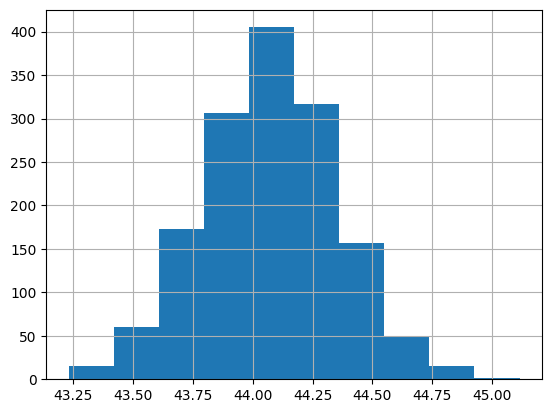

In [411]:
# Histograma de los promedios muestrales → forma una distribución normal
muestras.mean().hist()

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

**Comparaciones con la población normal**

In [412]:
# Media poblacional real
datos.Edad.mean()

np.float64(44.07142113482561)

In [413]:
# Media de las medias muestrales
muestras.mean().mean()

np.float64(44.07382)

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

>🔹 Esto es el error estándar estimado empíricamente
>
>🔸 Representa cuánto varían las medias de tus 1500 muestras respecto a la media general.

In [414]:
# Desviación estándar de las medias muestrales
# Estimar el error estándar empíricamente
muestras.mean().std()
print(f'El error estándar de las medias muestrales estimado empíricamente es de {muestras.mean().std():.4f} años.')

El error estándar de las medias muestrales estimado empíricamente es de 0.2796 años.


>🔹 Es la desviación estándar real de la población original (en este caso, la edad de las personas).
>
>🔸 Representa cuán dispersas están las edades individuales respecto a su media.

In [415]:
# Desviación estándar real: de la edad en la población
# Ver cuán dispersas están las edades individuales
datos.Edad.std()
print(f'La desviación estándar real de las edades en la población es de {datos.Edad.std():.2f} años.')

La desviación estándar real de las edades en la población es de 12.48 años.


>🔹 Es el error estándar teórico
>
>🔸 Te dice cuánto esperamos que varíen las medias muestrales, si tomáramos muchas muestras de tamaño n.

In [416]:
# Error estándar (estimado teóricamente): s / √n
# Predecir cuánto variarían las medias muestrales
datos.Edad.std() / np.sqrt(n)
print(f'El error estándar estimado teóricamente (σ / √n) es de {datos.Edad.std() / np.sqrt(n):.4f} años.')

El error estándar estimado teóricamente (σ / √n) es de 0.2791 años.


## <font color=green>4.2 Los niveles de confianza y significación</font>
***

El **nivel de confianza** ($1 - \alpha$) representa la probabilidad de que la estimación sea correcta. Además, el **nivel de significancia** ($\alpha$) expresa la probabilidad de error de la estimación.

El **nivel de confianza** representa el grado de confiabilidad del resultado estimado dentro de un cierto rango. Cuando establecemos un **nivel de confianza del 95%** en una encuesta, por ejemplo, estamos asumiendo que existe una probabilidad del 95% de que los resultados de la encuesta representen bien la realidad, es decir, sean correctos.

El **nivel de confianza** de una estimación se puede obtener del área bajo la curva normal como se muestra en la figura siguiente.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img007.png' width='450px'>


## <font color=green>4.3 Error inferencial</font>
***

El **error inferencial** se define por la **desviación estándar de las medias muestrales** $\sigma_\bar{x}$ y por el **nivel de confianza** determinado para el proceso.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

## <font color=green>4.4 Intervalos de confianza</font>
***

### Intervalo de confianza para la media poblacional

#### Con desviación estándar poblacional conocida

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Con desviación estándar de población desconocida

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

## <font color='blue'>Ejemplo: </font>

Suponga que los pesos de las bolsas de arroz de una industria alimentaria se distribuyen aproximadamente como una población normal con **desviación estándar igual a 150 g**. Se seleccionó una **muestra aleatoria de 20 bolsas** de un lote específico, se obtuvo un **peso promedio de 5.050 g**. Construya un intervalo de confianza para el **promedio de la población** asumiendo un **nivel de significancia del 5%**.

### Media muestral

Se define la media del peso de arroz observada en la muestra (20 bolsas). Esta será la base del intervalo de confianza.

In [417]:
# Se define la media muestral observada en las 20 bolsas
media_muestra = 5050
media_muestra  # Resultado: 5050

5050

### Nivel de significancia ($\alpha$)

El nivel de significancia indica el área total que dejamos fuera del intervalo de confianza (en ambos extremos). En este caso, es 5%, o sea, dejamos un 2.5% en cada cola de la curva.

In [418]:
# Se establece el nivel de significancia (α)
# Un nivel de confianza del 95% implica una significancia del 5% (0.05)
significancia = 0.05
significancia  # Resultado: 0.05

0.05

### Nivel de confianza ($1 - \alpha$)

Aquí se calcula que el 95% del área bajo la curva corresponde al intervalo de confianza: es la zona gris central donde esperamos que esté la media poblacional.

In [419]:
# Se calcula el nivel de confianza como complemento de la significancia
# Confianza = 1 - α → 1 - 0.05 = 0.95 (es decir, 95%)
confianza = 1 - significancia
confianza  # Resultado: 0.95

0.95

### Obteniendo $z$

Se muestra un fragmento de la tabla Z estandarizada, útil si queremos encontrar manualmente el valor crítico Z (como hiciste en tu imagen con el 1.9 + 0.06 = 1.96 para 95%).

In [420]:
# Se visualizan algunas filas de la tabla Z estándar (no obligatorio)
# Esto permite buscar manualmente el valor crítico Z si no se usa scipy
tabla_normal_estandarizada[16:26]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857
2.20,0.9861,0.9864,0.9868,0.9871,0.9875,0.9878,0.9881,0.9884,0.9887,0.9890
2.30,0.9893,0.9896,0.9898,0.9901,0.9904,0.9906,0.9909,0.9911,0.9913,0.9916
2.40,0.9918,0.9920,0.9922,0.9925,0.9927,0.9929,0.9931,0.9932,0.9934,0.9936
2.50,0.9938,0.9940,0.9941,0.9943,0.9945,0.9946,0.9948,0.9949,0.9951,0.9952


### Obteniendo $z$

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img008.png' width='450px'>

Se obtiene la mitad del área del intervalo de confianza, ya que este se reparte en ambos lados de la media.

In [421]:
# Cálculo de la mitad del nivel de confianza (para un intervalo bilateral)
mitad_nivel_confianza = confianza / 2

Se calcula el área total a la izquierda del valor crítico Z (95% / 2 + 50%), que corresponde a 0.975.

In [422]:
# Se suma 0.5 + 0.475 para obtener el área acumulada hasta Z
# Esto da 0.975, que representa la probabilidad acumulada a la izquierda de Z
0.5 + (mitad_nivel_confianza)  # Resultado: 0.975

0.975

Ejemplo de cómo se puede buscar el valor Z manualmente en la tabla.

In [423]:
# Este paso es auxiliar: si usas la tabla Z manualmente,
# puedes buscar Z que corresponde a un área de 0.975
# Por ejemplo, fila 1.9 y columna 0.06 → Z = 1.96
1.9 + 0.06  # Resultado: 1.96 (valor crítico Z aproximado)

1.96

Forma más precisa y automática de obtener el valor Z. ppf significa “percent point function”, es decir, el valor Z que deja a su izquierda el área deseada (0.975 en este caso).

In [424]:
# IMPORTANTE: obtener el valor crítico Z de forma automática con scipy
# norm.ppf(0.975) devuelve el valor Z cuyo área acumulada (izquierda) es 0.975
from scipy.stats import norm
z = norm.ppf(0.975)
z  # Resultado: 1.959963984540054 (aproximadamente 1.96)

np.float64(1.959963984540054)

In [425]:
norm.ppf(0.5 + (confianza / 2))

np.float64(1.959963984540054)

**Simplificando sería:**

In [426]:
from scipy.stats import norm
# z es el valor crítico Z correspondiente a un intervalo de confianza del 95% en una distribución normal estándar.
confianza = 0.95  # Nivel de confianza del 95%
z = norm.ppf(0.5 + (confianza / 2))  # Esto da norm.ppf(0.975)
print(z)  # Resultado: ~1.96

1.959963984540054


### Valores de $z$ para los niveles de confianza más utilizados

|Nivel de<br>confianza|Valor del área bajo<br>la curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0.95                               |1.645|
|95%               |0.975                              |1.96 |
|99%               |0.995                              |2.575|

### Obteniendo $\sigma_\bar{x}$

La desviación estándar nos indica qué tanto varían los valores individuales (pesos de las bolsas) respecto a la media poblacional. En este caso, ya viene dada: 150 gramos.

In [427]:
# Se define la desviación estándar poblacional según el enunciado del ejercicio.
desviacion_estandar = 150
desviacion_estandar  # Resultado: 150

150

Se seleccionaron 20 bolsas al azar. Este número se usa para calcular el error estándar.

In [428]:
# Se define el tamaño de la muestra, que corresponde al número de bolsas seleccionadas.
n = 20
n  # Resultado: 20

20

El 95% de confianza indica que, si tomáramos muchas muestras, el 95% de los intervalos construidos incluirían la media poblacional real.

In [429]:
# Se declara nuevamente el nivel de confianza (95%) por si no se había definido anteriormente.
confianza = 0.95
confianza  # Resultado: 0.95

0.95

Se usa esta raíz para obtener el error estándar (σₓ̄).

In [430]:
# Se calcula la raíz cuadrada del tamaño de la muestra.
raiz_de_n = np.sqrt(n)
raiz_de_n  # Resultado: 4.4721...

np.float64(4.47213595499958)

Este valor nos dice cuánto puede variar el promedio de los pesos de las muestras respecto a la media poblacional. Cuanto mayor n, menor el error estándar.

In [431]:
# Se calcula el error estándar de la media: cuánto tiende a variar el promedio de las muestras.
sigma = desviacion_estandar / raiz_de_n
sigma  # Resultado: 33.5410...

np.float64(33.54101966249684)

### Obteniendo $e$

El margen de error indica cuánto puede alejarse la media muestral de la media poblacional.

Con z≈1.96, se multiplica por el error estándar de la media para estimar el "rango de confianza".

In [432]:
# Se calcula el margen de error (e) multiplicando el valor crítico Z por el error estándar.
e = z * sigma
e  # Resultado: 65.7391...

np.float64(65.73919054324361)

### Solución 1 - Calculando el intervalo de confianza para la media
---
---
Solución Manual (usando suma y resta)

Esto nos da el rango estimado donde probablemente esté el promedio real del lote de arroz, con un 95% de confianza.

In [433]:
# Se construye el intervalo de confianza sumando y restando el margen de error a la media muestral.
intervalo = (
    media_muestra - e,
    media_muestra + e
)
intervalo  # Resultado: (4984.26, 5115.73)

(np.float64(4984.260809456757), np.float64(5115.739190543243))

### Solución 2 - Calculando el intervalo de confianza para la media
---
---
Solución Automática con scipy

Esta función hace lo mismo que la solución manual, pero automáticamente.
Usa los parámetros:

* confidence: nivel de confianza (95%)

* loc: media muestral

* scale: sigma (error estándar)

Nos devuelve el mismo resultado: un intervalo de confianza del 95%.

In [434]:
# Se calcula el intervalo de confianza automáticamente usando la función de scipy.
norm.interval(confidence = confianza, loc = media_muestra, scale = sigma)
# Resultado: (4984.26, 5115.73)

(np.float64(4984.260809456757), np.float64(5115.739190543243))

**Ejercicio**

Para estimar la cantidad media gastada por cada cliente de una gran cadena de comida rápida, se seleccionó una muestra de 50 clientes.

Suponiendo que el valor de la desviación estándar de la población es de $ 6,00 y que esta población se distribuye normalmente, obtenga el margen de error de esta estimación para un nivel de confianza del 95%.

In [435]:
from scipy.stats import norm
import numpy as np

# Se define el tamaño de la muestra: se seleccionaron 50 clientes
n = 50

# Se establece la desviación estándar de la población, que es de $6 según el enunciado
desviacion_estandar = 6

# Se define el nivel de confianza deseado: 95%
confianza = 0.95

# Se calcula el valor crítico Z, que delimita la región central del 95% de probabilidad bajo la curva normal
# Esto equivale a buscar el punto z tal que el área acumulada a su izquierda sea 0.975 (0.5 + 0.95 / 2)
z = norm.ppf(0.5 + (confianza / 2))

# Se calcula la raíz cuadrada del tamaño de la muestra, necesaria para el error estándar
raiz_de_n = np.sqrt(n)

# Se calcula el error estándar dividiendo la desviación estándar por la raíz del tamaño de la muestra
sigma = desviacion_estandar / raiz_de_n

# Se calcula el margen de error multiplicando el valor Z por el error estándar
e = z * sigma

# Se imprime el margen de error, con una explicación clara del resultado
print(f"El margen de error para estimar la cantidad media gastada por cliente es de aproximadamente ${e:.2f}.")
print(f"Con un nivel de confianza del 95%, la estimación puede variar en ±{e:.2f} dólares.")
z

El margen de error para estimar la cantidad media gastada por cliente es de aproximadamente $1.66.
Con un nivel de confianza del 95%, la estimación puede variar en ±1.66 dólares.


np.float64(1.959963984540054)

**Ejercicio 2**

Una muestra aleatoria simple de 1976 elementos de una población distribuida normalmente, con una desviación estándar de 11, dio como resultado una media muestral de 28.

¿Cuál es el intervalo de confianza del 90% para la media de la población?

In [436]:
from scipy.stats import norm
import numpy as np

# Tamaño de la muestra
n = 1976

# Nivel de confianza del 90%
confianza = 0.9

# Media muestral observada
media_muestra = 28

# Desviación estándar poblacional
desviacion_estandar = 11

# Raíz cuadrada de n
raiz_de_n = np.sqrt(n)

# Error estándar
sigma = desviacion_estandar / raiz_de_n

# Intervalo de confianza usando distribución normal
intervalo = norm.interval(confidence = confianza, loc = media_muestra, scale = sigma)

# Resultado final
print(f"Con un 90% de confianza, la media poblacional está entre {intervalo[0]:.2f} y {intervalo[1]:.2f}")

Con un 90% de confianza, la media poblacional está entre 27.59 y 28.41


# <font color=green>5 CÁLCULO DEL TAMAÑO DE LA MUESTRA</font>
***

## <font color='red'>Problema </font>

Estamos estudiando los ingresos mensuales de los jefes de hogar con ingresos de hasta R$\$$ 5.000,00 en Brasil. Nuestro supervisor determinó que el **error máximo en relación a la media es de R$\$$ 10,00**. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **R$\$$ 1.082,79**. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio?

## <font color=green>5.1 Variables cuantitativas y población infinita</font>
***

# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Con desviación estándar conocida

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Con desviación estándar desconocida

## $$n = \left(z\frac{s}{e}\right)^2$$

Donde:

$z$ = variable normal estandarizada

$\sigma$ = desviación estándar poblacional

$s$ = desviación estándar de la muestra

$e$ = error inferencial

### <font color='red'>Comentarios</font>

1. La desviación estándar ($\sigma$ o $s$) y el error ($e$) deben estar en la misma unidad de medida.

2. Cuando el error ($e$) se representa en términos porcentuales, debe interpretarse como un porcentaje relacionado con el promedio.

## <font color='blue'>Ejemplo: Rendimiento medio</font>

Estamos estudiando los ingresos mensuales de los jefes de hogar. Nuestro supervisor determinó que el **error máximo en relación a la media es de $\$$ 100,00** pesos. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **$\$$ 3.323,39** pesos. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio?

In [437]:
# Nivel de confianza deseado (95%)
confianza = 0.95
confianza

0.95

In [438]:
# Se obtiene el valor crítico Z para el nivel de confianza dado
z = 0.5 + (confianza / 2)
z

0.975

### Obteniendo $\sigma$

In [439]:
# Desviación estándar poblacional conocida (σ)
sigma = 3323.39
sigma

3323.39

### Obteniendo $e$

In [440]:
# Margen de error máximo permitido en la estimación (e)
e = 100
e

100

### Obteniendo $n$

In [443]:
# Se aplica la fórmula del tamaño de muestra: n = (z * (σ / e))²
n = (z * (sigma/e)) ** 2
# Se redondea al entero más cercano
n = int(round(n))
# Imprime el tamaño de muestra requerido con explicación
print(f'Para estimar la media de ingresos con un margen de error máximo de ${e} y un nivel de confianza del {int(confianza*100)}%, se necesita una muestra de al menos {n} personas.')

Para estimar la media de ingresos con un margen de error máximo de $100 y un nivel de confianza del 95%, se necesita una muestra de al menos 1050 personas.


**Ejercicio**

El valor promedio gastado por los clientes en una tienda es de `$ 45.50`. Suponiendo que la desviación estándar de los gastos es de `$ 15.00`, ¿cuál debería ser el tamaño de la muestra para estimar la media de la población con un nivel de significancia del 10%?

Tenga en cuenta que el error máximo aceptable es del 10%.

In [444]:
from scipy.stats import norm

In [445]:
# Nivel de confianza: como la significancia es 10%, la confianza es 90%
confianza = 1-0.1
confianza

0.9

In [446]:
# Desviación estándar de los gastos de los clientes
sigma = 15.00
sigma

15.0

In [447]:
# Media poblacional (solo para calcular el error permitido)
promedio_gastado = 45.50
promedio_gastado

45.5

In [448]:
# Error máximo permitido: 10% de la media
e = promedio_gastado * 0.1
e

4.55

In [449]:
# Valor crítico Z correspondiente al nivel de confianza (90%)
z = norm.ppf(0.5 + (confianza / 2))
z

np.float64(1.6448536269514722)

In [450]:
# Cálculo del tamaño de muestra necesario usando la fórmula:
# n = (Z * σ / e)^2
n = (z * (sigma/e)) ** 2

# Redondeamos el tamaño de la muestra al entero más cercano
n = int(n.round())

# Mostramos el resultado con una explicación clara
print(f'Para estimar la media poblacional con un {confianza*100:.0f}% de confianza y un error máximo del 10%, se necesita una muestra de al menos {n} personas.')

Para estimar la media poblacional con un 90% de confianza y un error máximo del 10%, se necesita una muestra de al menos 29 personas.


---
---

## <font color='red'>Problema</font>

En un lote de **10 000 latas** de gaseosa, se realizó una muestra aleatoria simple de **100 latas** y se obtuvo que la **desviación estándar muestral del contenido de las latas es igual a 12 ml**. El fabricante estipula un **error máximo en la media poblacional de solo 5 ml**. Para garantizar un **nivel de confianza del 95%**, ¿qué tamaño de muestra se debe seleccionar para este estudio?

## <font color=green>5.2 Variables cuantitativas y población finita</font>
***

#### Con desviación estándar conocida

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Con desviación estándar desconocida

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Donde:

$N$ = tamaño de la población

$z$ = variable normal estandarizada

$\sigma$ = desviación estándar poblacional

$s$ = desviación estándar muestral

$e$ = error inferencial

## <font color='blue'>Ejemplo: Industria de refrescos</font>

En un lote de **10 000 latas** de gaseosa, se realizó una muestra aleatoria simple de **100 latas** y se obtuvo que la **desviación estándar muestral del contenido de las latas es igual a 12 ml**. El fabricante estipula un **error máximo en la media poblacional de solo 5 ml**. Para garantizar un **nivel de confianza del 95%**, ¿qué tamaño de muestra se debe seleccionar para este estudio?

### Obteniendo $N$

In [451]:
from scipy.stats import norm

In [452]:
# Tamaño de la población
N = 10000 # Total de latas en el lote
N

10000

### Obteniendo $z$

In [453]:
# Nivel de confianza deseado
confianza = 0.95
confianza

0.95

In [454]:
# Valor crítico Z correspondiente al nivel de confianza
z = norm.ppf(0.5 +(confianza / 2)) # Esto da z ≈ 1.96
z

np.float64(1.959963984540054)

### Obteniendo $s$

In [455]:
# Desviación estándar muestral (estimación de la dispersión)
s = 12 # ml
s

12

### Obteniendo $e$

In [456]:
# Error máximo permitido para la estimación de la media
e = 5 # ml
e

5

### Obteniendo $n$

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [457]:
# Fórmula para el tamaño de muestra con corrección para población finita:
# n = [Z² * s² * N] / [Z² * s² + e² * (N - 1)]
n = ((z**2)*(s**2)*(N)  / ((z**2)*(s**2)+(e**2)*(N-1)))

# Redondeamos el tamaño de la muestra al número entero más cercano
n = int(n.round())

# Mostramos el resultado con una explicación
print(f'Se debe seleccionar una muestra de aproximadamente ({n}) latas para estimar la media con un error máximo de {e} ml y un 95% de confianza.')

Se debe seleccionar una muestra de aproximadamente (22) latas para estimar la media con un error máximo de 5 ml y un 95% de confianza.


**Ejercicio**

* Un fabricante de harina encontró que, en una muestra aleatoria compuesta por 200 sacos de 25 kg de un lote compuesto por 2000 sacos, mostraba una desviación estándar muestral del peso igual a 480 g.

* Considerando un error máximo asociado con el promedio poblacional de 0.3 kg y un nivel de confianza del 95%, ¿qué tamaño de muestra debe seleccionarse para obtener una estimación confiable del parámetro poblacional?

In [458]:
from scipy.stats import norm

In [459]:
# Nivel de confianza
confianza = 0.95 # 95% de confianza
confianza

0.95

In [460]:
# Tamaño total de la población
N = 2000 # Total de sacos en el lote
N

2000

In [461]:
# Error máximo permitido en la media poblacional (convertido a gramos)
e = 0.3 * 1000 # 0.3 kg = 300 g. Debe estar en la misma unidad que la desviación estándar
e

300.0

In [462]:
# Desviación estándar muestral (en gramos)
s = 480 # g
s

480

In [463]:
# Valor Z correspondiente al nivel de confianza (Z ≈ 1.96 para 95%)
z = norm.ppf(0.5 +(confianza / 2))
z

np.float64(1.959963984540054)

In [464]:
# Cálculo del tamaño de muestra con corrección para población finita:
# n = [Z² * s² * N] / [Z² * s² + e² * (N - 1)]
n = ((z**2)*(s**2)*(N)  / ((z**2)*(s**2)+(e**2)*(N-1)))

# Redondeo del resultado al entero más cercano
n = int(n.round())

# Resultado final
print(f"Para obtener una estimación confiable con un error máximo de 0.3 kg y un 95% de confianza,\n"
      f"Se deben seleccionar al menos ({n}) sacos para la muestra.")

Para obtener una estimación confiable con un error máximo de 0.3 kg y un 95% de confianza,
Se deben seleccionar al menos (10) sacos para la muestra.


# <font color=green>6 FIJANDO EL CONTENIDO</font>
***

## <font color='blue'>Ejemplo: Rendimiento medio</font>

Estamos estudiando **los ingresos mensuales de los jefes de hogar con ingresos de hasta R$\$$ 5.000,00 en Brasil**. Nuestro supervisor determinó que el **error máximo en relación a la media es de R$\$$ 10,00**. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **R$\$$ 1.082,79** y que la **media poblacional** es **R$\$$ 1.426,54**. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio? ¿Cuál es el intervalo de confianza para la media considerando el tamaño de muestra obtenido?

### Construyendo el conjunto de datos según lo especificado por el problema

In [465]:
from scipy.stats import norm
import numpy as np

* Se está filtrando el conjunto de datos original (datos) para quedarse solo con los ingresos que son menores o iguales a 5000.

* Esto responde a la condición del problema: analizar solo los jefes de hogar con ingresos hasta R$ 5.000.

* Se asume que la población es infinita porque no se considera un número total fijo de individuos.

In [466]:
# Como el tamaño de la muestra es tan grande, asumimos que la población es infinita
ingresos_5000 = datos.query('Ingreso <= 5000').Ingreso

* Se calculan dos parámetros estadísticos claves:

* sigma: Desviación estándar poblacional del grupo seleccionado.

* media: Media poblacional del mismo grupo.

* Ambos se usarán más adelante para calcular el tamaño de la muestra y el intervalo de confianza.

In [467]:
# Calculamos la desviación estándar poblacional de los ingresos filtrados
sigma = ingresos_5000.std()
sigma

1082.794549030635

In [468]:
# Calculamos la media poblacional de los ingresos filtrados
media = ingresos_5000.mean()
media

np.float64(1426.5372144947232)

### Calcular el tamaño de la muestra

Se utiliza la fórmula del tamaño de muestra para poblaciones infinitas:

**𝑛=(𝑧⋅𝜎/𝑒)^2**

Donde:

* `z` es el valor Z de la distribución normal para 95% de confianza.

* `sigma` es la desviación estándar.

* `e` es el error máximo permitido.

* Finalmente se redondea el valor resultante con round() y se convierte a entero con int().

In [469]:
# Calculamos el valor z asociado al 95% de confianza
z = norm.ppf(0.5 + (0.95 / 2 )) # Resultado aproximado: 1.96

# Definimos el error máximo permitido (en reales)
e = 10

# Aplicamos la fórmula para el cálculo del tamaño de muestra
n = (z * (sigma / e)) ** 2

# Redondeamos el resultado a entero
n = int(n.round())

# Mostramos el valor de n
n

45039

### Calcular el intervalo de confianza para la media

* Se utiliza la función norm.interval() para calcular el intervalo de confianza al 95%.

* El margen de error es calculado con la fórmula del error estándar:
 $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

* El intervalo resultante nos dice que, con un 95% de confianza, la media poblacional se encuentra entre esos dos valores.

In [470]:
# Se calcula el intervalo de confianza para la media poblacional
intervalo = norm.interval(
    confidence=0.95,     # Nivel de confianza
    loc=media,           # Media poblacional
    scale=sigma / np.sqrt(n)  # Error estándar (σ / √n)
)

# El intervalo tiene esta forma: [media - margen, media + margen]
# El intervalo de confianza = Media Muestral ± Error
intervalo # el intervalo de confianza = Media Muestral ± Error

(np.float64(1416.5372195108241), np.float64(1436.5372094786223))

### Simulación gráfica para verificar el comportamiento de la media muestral

* Se generan 1.000 muestras aleatorias de tamaño n, calculando la media de cada una.

* Luego se grafica cada media para observar su distribución.

* Se añaden tres líneas horizontales:

* La media real poblacional (línea negra punteada).

* Los extremos del intervalo de confianza (líneas rojas punteadas).

* El gráfico visualiza cuántas de esas medias simuladas caen dentro del intervalo, verificando empíricamente la confianza del 95%.

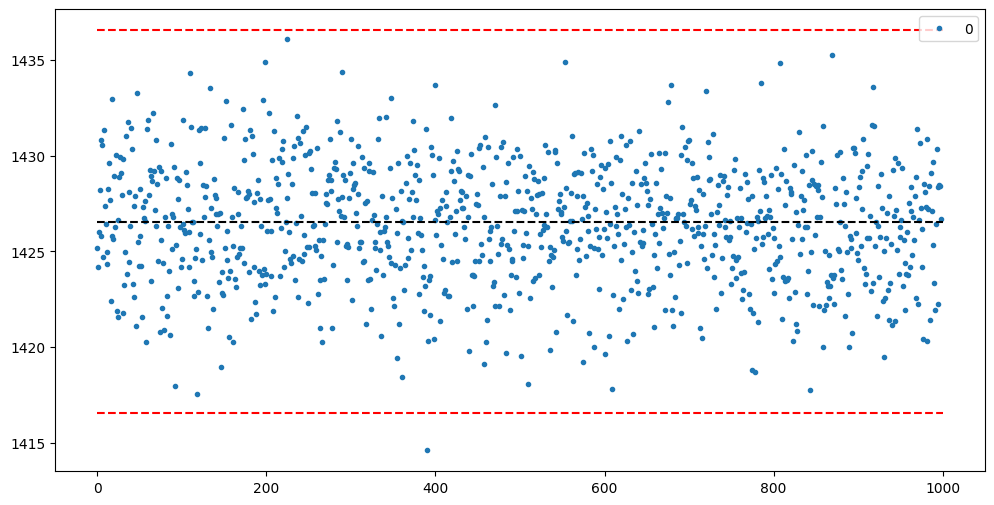

In [471]:
import matplotlib.pyplot as plt

tamano_simulacion = 1000  # Número de muestras a generar

# Creamos el conjunto de medias muestrales (1.000 simulaciones)
medias = [ingresos_5000.sample(n=n).mean() for i in range(1, tamano_simulacion)]
medias = pd.DataFrame(medias)  # Convertimos la lista en un DataFrame

# Mostramos el gráfico
ax = medias.plot(style='.')
ax.figure.set_size_inches(12, 6)

# Línea de la media poblacional
ax.hlines(y=media, xmin=0, xmax=tamano_simulacion, colors='black', linestyles='--')

# Líneas del intervalo de confianza
ax.hlines(y=intervalo[0], xmin=0, xmax=tamano_simulacion, colors='red', linestyles='--')
ax.hlines(y=intervalo[1], xmin=0, xmax=tamano_simulacion, colors='red', linestyles='--')
